In [43]:
import hifive
import pyBigWig
import numpy as np
import matplotlib.pyplot as plt

## Loading in Data

in Bash: 

hifive fends -L 3DGenomeData/genome/mm9.len --binned 100000 -g mm9 partition_file

hifive hic-data -X CDGenomeData/data/WT100kb/raw*.mat partition_file interaction_counts

hifive hic-project -f25 -n25 -j100000 interaction_counts hic_proj

hifive hic-normalize express -f 25 -w cis hic_proj

## Working with Hi-C Data

In [3]:
hic = hifive.HiC('/Users/cmdb/qbb2020-answers/quantbio/week11/hic_proj', 'r')

In [4]:
data = hic.cis_heatmap('chr1', 1000000, datatype='fend', arraytype='full', diagonalincluded=True)

Finding fend full array for chr1:1000000-197150001... Done


In [10]:
data +=1
enrichment = data[:, :, 0] / data[:, :, 1]
enrichment_log = np.log2(data[:, :, 0]) / (data[:, :, 1]) #log transform array

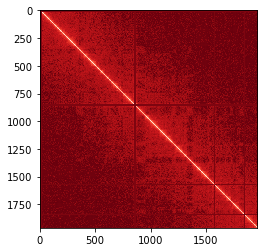

In [31]:
fig, ax = plt.subplots()
plt.imshow(enrichment_log, cmap='Reds_r')
plt.show()

## Compartment analysis

In [6]:
Comp = hifive.hic_domains.Compartment(hic, 100000, chroms=['chr13'], out_fname='tmp.hdf5')
Comp.write_eigen_scores('hic_comp.bed')

Finding expected full array for chr13:3000000-120300000... Done
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an arr

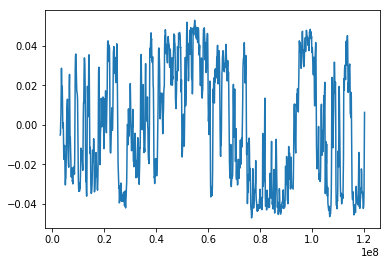

In [34]:
X = Comp.positions['chr13']
Y = Comp.eigenv['chr13']

plt.plot(X[:,0],Y)
plt.show()

In [ ]:
in bash: 
    
grep "-" hic_comp.bed > neg_score.bed

grep -v - hic_comp.bed > pos_score.bed

bedtools intersect -wo -a 3DGenomeData/data/WT_fpkm.bed -b neg_score.bed > comp_neg.bed

bedtools intersect -wo -a 3DGenomeData/data/WT_fpkm.bed -b pos_score.bed > comp_pos.bed

In [4]:
#use pandas data frames?? jk jk this is too much 
#numpy to the rescue!!!!!!!!
#bed is text file, upload data into numpy array 
neg_array = np.genfromtxt ('comp_neg.bed')
pos_array = np.genfromtxt ('comp_pos.bed')
#neg_log=np.log(neg_array) #divide by zero error
#pos_log=np.log(pos_array)
neg_log = np.log2(neg_array[:,4]+1)
pos_log = np.log2(pos_array[:,4]+1)
violin_data = [pos_log, neg_log]


In [85]:
neg_array

array([[            nan,  3.14872100e+06,  3.18892400e+06, ...,
         3.20000000e+06, -4.57800000e-03,  4.02030000e+04],
       [            nan,  4.05883700e+06,  4.08966800e+06, ...,
         4.10000000e+06, -7.16000000e-04,  3.08310000e+04],
       [            nan,  4.13186100e+06,  4.14989200e+06, ...,
         4.20000000e+06, -1.67500000e-03,  1.80310000e+04],
       ...,
       [            nan,  1.19392217e+08,  1.19447550e+08, ...,
         1.19500000e+08, -3.39310000e-02,  4.75500000e+04],
       [            nan,  1.19503506e+08,  1.19581380e+08, ...,
         1.19600000e+08, -3.47770000e-02,  7.78740000e+04],
       [            nan,  1.20124334e+08,  1.20198064e+08, ...,
         1.20200000e+08, -1.58820000e-02,  7.37300000e+04]])

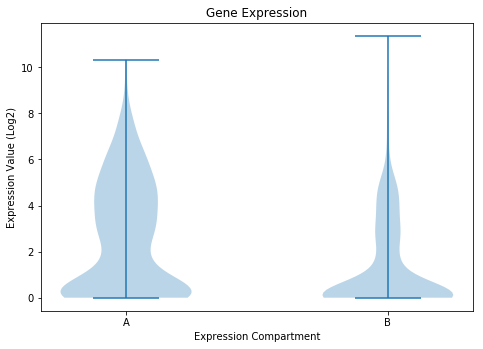

In [11]:
exp_comp = ['A', 'B']

fig = plt.figure()
ax = fig.subplots()
ax = fig.add_axes([0,0,1,1])
ax.set_xticklabels(exp_comp)
ax.set_xticks(np.arange(1, len(exp_comp) + 1))
ax.set_xlabel('Expression Compartment')
ax.set_ylabel('Expression Value (Log2)')
ax.set_title('Gene Expression')
viv_plot = ax.violinplot(violin_data)
plt.show()

## Expression vs. Repression

In [16]:
bw = pyBigWig.open('3DGenomeData/data/WT_H3K27me3.bw')
bw.stats('chr1', 1100000, 1200000, type='sum')

[None]

In [24]:
#iterating through negative compartment expression/methylation counts
exp_list_neg = []
methyl_list_neg = []

for i in open('neg_score.bed'):
    field = i.strip('\r\n').split('\t')
    start = int(field[1])
    end = int(field[2])
    exp = field [3]
    exp_list_neg.append(exp)
    methyl_stat = bw.stats('chr13', start, end, type='sum')
    if methyl_stat == [None]:
        methyl_list_neg.append([0])
    else: 
        methyl_list_neg.append(methyl_stat)
print(exp_list_neg, methyl_list_neg )

(['-0.005205', '-0.004578', '-0.000716', '-0.001675', '-0.009331', '-0.017516', '-0.017383', '-0.012338', '-0.010438', '-0.016438', '-0.026320', '-0.030430', '-0.027394', '-0.027019', '-0.020319', '-0.012197', '-0.000591', '-0.010094', '-0.017364', '-0.020473', '-0.021472', '-0.004470', '-0.006479', '-0.006238', '-0.010837', '-0.017135', '-0.023204', '-0.026404', '-0.022444', '-0.021704', '-0.025428', '-0.028658', '-0.028105', '-0.029919', '-0.025553', '-0.023070', '-0.021355', '-0.024626', '-0.023200', '-0.024971', '-0.016576', '-0.001771', '-0.020639', '-0.027289', '-0.032125', '-0.033673', '-0.029304', '-0.033512', '-0.033459', '-0.031706', '-0.031931', '-0.027112', '-0.020498', '-0.011838', '-0.014632', '-0.017902', '-0.013100', '-0.014338', '-0.017324', '-0.020843', '-0.023041', '-0.014491', '-0.020654', '-0.028777', '-0.026082', '-0.033534', '-0.036104', '-0.027213', '-0.001227', '-0.010359', '-0.014593', '-0.011433', '-0.015369', '-0.029922', '-0.034613', '-0.034705', '-0.034227

In [22]:
print(len(methyl_list_neg))

615


In [23]:
print(len(exp_list_neg))##want to make sure they line up/have  same number of values 

615


In [28]:
#iterating through positive compartment expression/methylation counts
exp_list_pos = []
methyl_list_pos = []

for i in open('pos_score.bed'):
    field = i.strip('\r\n').split('\t')
    start = int(field[1])
    end = int(field[2])
    exp = field[3]
    exp_list_pos.append(exp)
    #methyl_stat = bw.stats('chr13',1100000, 1200000, type='sum')
    methyl_stat = bw.stats('chr13', start, end, type='sum')
    if methyl_stat == [None]:
        methyl_list_pos.append([0])
    else: 
        methyl_list_pos.append(methyl_stat)
print(exp_list_pos, methyl_list_pos)

RuntimeError: Invalid interval bounds!

In [34]:
print(len(exp_list_pos))

553


In [35]:
print(len(methyl_list_pos))

552


In [37]:
methyl_list_pos.append([0])

In [38]:
print(len(methyl_list_pos))

553


In [31]:
print(exp_list_pos, methyl_list_pos)

(['0.000617', '0.005744', '0.017047', '0.028550', '0.021227', '0.014095', '0.019423', '0.011376', '0.000928', '0.001694', '0.008079', '0.010861', '0.012914', '0.019842', '0.025448', '0.005672', '0.004512', '0.027429', '0.034522', '0.035765', '0.033075', '0.026411', '0.021644', '0.016660', '0.016427', '0.015207', '0.012461', '0.004052', '0.011292', '0.011032', '0.025641', '0.033790', '0.033547', '0.030456', '0.021814', '0.007609', '0.019401', '0.013799', '0.010228', '0.004088', '0.012648', '0.029939', '0.035342', '0.027090', '0.004296', '0.000888', '0.027003', '0.029077', '0.022195', '0.001832', '0.013336', '0.012105', '0.005285', '0.000974', '0.003012', '0.012807', '0.014021', '0.012736', '0.006863', '0.001460', '0.012975', '0.013054', '0.005622', '0.010126', '0.017114', '0.007396', '0.005125', '0.011703', '0.016263', '0.033176', '0.041816', '0.042400', '0.040366', '0.031984', '0.034448', '0.040284', '0.038784', '0.038968', '0.022971', '0.005193', '0.008522', '0.003470', '0.007356', '0

<function matplotlib.pyplot.show>

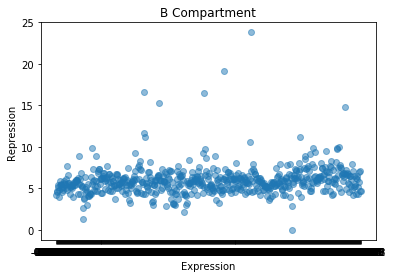

In [47]:
fig,ax = plt.subplots()
ax.set_xlabel('Expression')
ax.set_ylabel('Repression')
ax.set_title('B Compartment')
plt.scatter(exp_list_neg, methyl_list_neg, alpha =0.5)
plt.show

<function matplotlib.pyplot.show>

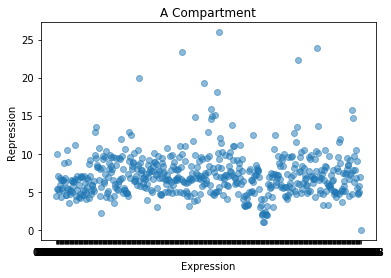

In [46]:
fig,ax = plt.subplots()
ax.set_xlabel('Expression')
ax.set_ylabel('Repression')
ax.set_title('A Compartment')
plt.scatter(exp_list_pos, methyl_list_pos, alpha =0.5)
plt.show